# Cykly


Při opakování kódu většinou známe počet opakování a používáme cyklus `for`. Za deklarací použité proměnné pro řízení cyklu a za seznamem, přes který proměnná iteruje, je dvojtečka. Blok příkazů, které se opakují, je odsazen o čtyři mezery.

Níže jsou základní techniky.

## Prostá iterace

In [1]:
for i in range(5):
    print("Toto se tiskne pětkrát")

Toto se tiskne pětkrát
Toto se tiskne pětkrát
Toto se tiskne pětkrát
Toto se tiskne pětkrát
Toto se tiskne pětkrát


## Iterace přes seznam

Často iterujeme přes seznam hodnot.

In [2]:
stromy = ["buk", "smrk", "jedle", "dub"]
for strom in stromy:
    print(f"Můj oblíbený strom je {strom}.")

Můj oblíbený strom je buk.
Můj oblíbený strom je smrk.
Můj oblíbený strom je jedle.
Můj oblíbený strom je dub.


V těle cyklu může být sada příkazů na libovolný počet řádků. Pokud je v těle cyklu jeden příkaz a výstup chceme uložit do seznamu, je možné použít i následující variantu. 

In [3]:
stromy = ["buk", "smrk", "jedle", "dub"]
vysledek = [f"Můj oblíbený strom je {strom}." for strom in stromy]
vysledek

['Můj oblíbený strom je buk.',
 'Můj oblíbený strom je smrk.',
 'Můj oblíbený strom je jedle.',
 'Můj oblíbený strom je dub.']

 ## Iterace přes více seznamů současně

Pomocí `zip` je možné iterovat přes více seznamů současně.

In [17]:
stromy = ["buk", "smrk", "tis", "dub"]
lide = ["Jan", "Jana", "Tom", "Jiří"]
for clovek,strom in zip(lide,stromy):
    print(f"{clovek} má na zahrádce {strom}.")

Jan má na zahrádce buk.
Jana má na zahrádce smrk.
Tom má na zahrádce tis.
Jiří má na zahrádce dub.


## Iterace se sledováním pozice v seznamu 

Někdy je vhodné při iterování znát i pozici v seznamu, která je právě zpracovávána. Toho dosáhneme pomocí `enumerate`.

In [34]:
stromy = ["buk", "smrk", "tis", "dub"]
lide = ["Jan", "Mirek", "Tom", "Jiří"]
for i,strom in enumerate(stromy):
    print(f"{lide[i]} má na zahrádce {strom}.")

Jan má na zahrádce buk.
Mirek má na zahrádce smrk.
Tom má na zahrádce tis.
Jiří má na zahrádce dub.


## Praktická poznámka

Zpravidla nejprve odladíme jednu otočku cyklu a potom doplníme volání cyklu a odsazení těla cyklu.

In [31]:
clovek = "Adam"
strom = "třešeň"
strom = strom.capitalize()
print(f"{strom} zasadil {clovek}.")

Třešeň zasadil Adam.


In [33]:
stromy = ["buk", "smrk", "tis", "dub"]
lide = ["Jan", "Mirek", "Tom", "Jiří"]
for clovek,strom in zip(lide,stromy):
    strom = strom.capitalize()
    print(f"{strom} zasadil {clovek}.")

Buk zasadil Jan.
Smrk zasadil Mirek.
Tis zasadil Tom.
Dub zasadil Jiří.


## Předčasné ukončení

Cyklus je možno opustit i předčasně pomocí `break`. Použití má smysl uvnitř nějaké podmínky. Uvnitř podmínky je další odsazení.

Příkaz `break` ukončí celý cyklus. Je možné použít i příkaz `continue`, který přeruší pouze danou otočku cyklu a přejde k další otočce v pořadí. 

In [29]:
for i in range(10):
    druha_mocnina = i**2
    if druha_mocnina > 30:
        print("Druhá mocnina dosáhla vysokou hodnotu, končím.")
        # Pokud je druha mocnina cisla i vetsi nez 30, prerusime cyklus
        break
    print (f"Druhá mocnina čísla {i} je {druha_mocnina}.")
# Kontrola, kdy se cyklus zastavil        
i

Druhá mocnina čísla 0 je 0.
Druhá mocnina čísla 1 je 1.
Druhá mocnina čísla 2 je 4.
Druhá mocnina čísla 3 je 9.
Druhá mocnina čísla 4 je 16.
Druhá mocnina čísla 5 je 25.
Druhá mocnina dosáhla vysokou hodnotu, končím.


6

## Praktická ukázka

Vyřešíme diferenciální rovnici logistického růstu pro různé hodnoty nosné kapacity. Data schováme v tabulce a nakonec je vykreslíme. Jednotlivé otočky cyklu jsou použity k vytvoření sloupců s daty. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp


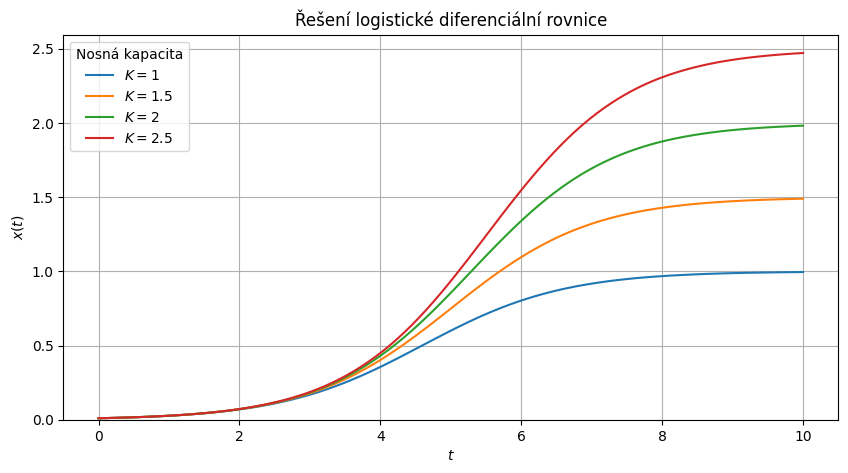

In [55]:
pocatecni_podminka = [0.01]
meze = [0,10]
pocet_hodnot = 100
hodnoty_K = [1,1.5,2,2.5]

def rovnice(t, x, r=1, K=1):
    return r*x*(1-x/K)

df = pd.DataFrame()
df["t"] = np.linspace(*meze,pocet_hodnot)

for K in hodnoty_K:
    reseni = solve_ivp(
                   rovnice,
                   meze,
                   pocatecni_podminka,
                   t_eval=df["t"],
                   args=(1,K)
                   ).y[0]
    df[K] = reseni
    
fig,ax = plt.subplots(figsize=(10,5))    

df.plot(x="t", ax=ax)    

ax.set(
    ylim = (0,None),
    title = "Řešení logistické diferenciální rovnice",
    xlabel=r"$t$",
    ylabel=r"$x(t)$",
)
ax.legend([f"$K={K}$" for K in hodnoty_K], title="Nosná kapacita")
ax.grid()